Using CPU. Note: This module is much faster with a GPU.


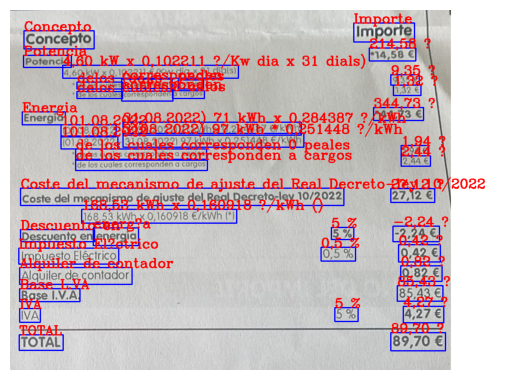

In [33]:

import cv2
import easyocr
import matplotlib.pyplot as plt




image_path = 'images/detalle_fact.png'

img = cv2.imread(image_path)



reader = easyocr.Reader(['es'], gpu=False)


text_ = reader.readtext(img)

for t in text_:
    bbox, text, score = t

    cv2.rectangle(img, bbox[0], bbox[2], (255,0,0), 2)
    cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Using CPU. Note: This module is much faster with a GPU.


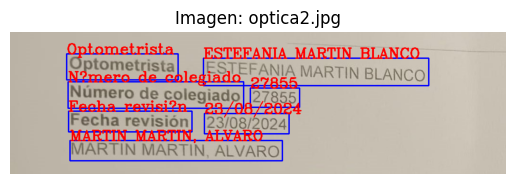

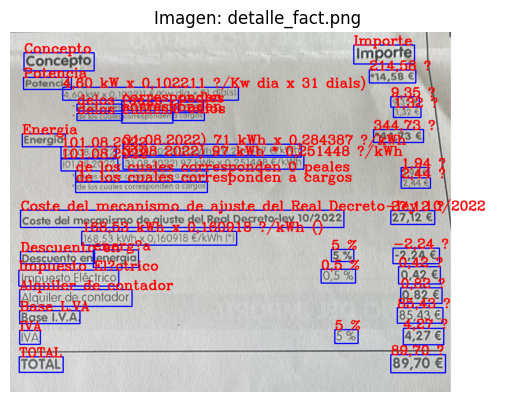

,Archivo,Texto,Confianza
0,optica2.jpg,Optometrista,0.999934
1,optica2.jpg,ESTEFANIA MARTIN BLANCO,0.824680
2,optica2.jpg,Número de colegiado,0.842160
3,optica2.jpg,27855,0.999998
4,optica2.jpg,Fecha revisión,0.999863
5,optica2.jpg,23/08/2024,0.725866
6,optica2.jpg,"MARTIN MARTIN, ALVARO",0.765486
7,detalle_fact.png,Concepto,0.999763
8,detalle_fact.png,Importe,0.852276
9,detalle_fact.png,"214,58 €",0.754054


In [35]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import os
import pandas as pd

# Directorio de imágenes y nombres de archivo
image_dir = 'images/'  # Cambia este directorio si es necesario
image_filenames = ['optica2.jpg', 'detalle_fact.png']  # Dos imágenes para procesar

# Crear lista para almacenar los resultados
data = []

# Cargar el lector de EasyOCR
reader = easyocr.Reader(['es'], gpu=False)

# Procesar cada imagen en la lista
for image_filename in image_filenames:
    # Leer la imagen
    image_path = os.path.join(image_dir, image_filename)
    img = cv2.imread(image_path)

    # Obtener el texto detectado en la imagen
    text_ = reader.readtext(img)

    # Dibujar las cajas de los textos detectados y extraer los valores
    for t in text_:
        bbox, text, score = t
        cv2.rectangle(img, bbox[0], bbox[2], (255, 0, 0), 2)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

        # Agregar los datos extraídos a la lista
        data.append({
            'Archivo': image_filename,
            'Texto': text,
            'Confianza': score
        })

    # Mostrar la imagen con los textos detectados
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Imagen: {image_filename}')
    plt.show()

# Crear un DataFrame con los resultados
df = pd.DataFrame(data)

# Mostrar el DataFrame
df


In [ ]:
import cv2
import easyocr
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

# Configurar la página
st.title('OCR con EasyOCR y Streamlit')

# Subir la imagen
uploaded_file = st.file_uploader("Carga una imagen", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Convertir la imagen cargada a un formato que OpenCV pueda usar
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, 1)

    # Cargar el lector de EasyOCR
    reader = easyocr.Reader(['es'], gpu=False)
    
    # Obtener el texto detectado en la imagen
    text_ = reader.readtext(img)

    # Dibujar las cajas de los textos detectados
    for t in text_:
        bbox, text, score = t
        cv2.rectangle(img, bbox[0], bbox[2], (255, 0, 0), 2)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

    # Mostrar la imagen con los textos detectados
    st.image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), caption='Imagen procesada', use_column_width=True)


In [3]:
import cv2

def main():
    # Lista de cámaras disponibles
    cameras = ["Cámara integrada (0)", "Cámara externa (1)"]

    # Selecciona la cámara que deseas usar
    print("Selecciona una cámara:")
    for i, cam in enumerate(cameras):
        print(f"{i}: {cam}")
    
    camera_index = int(input("Escribe el número de la cámara que quieres usar: "))

    # Inicializa la captura de video con el índice seleccionado
    cap = cv2.VideoCapture(camera_index)

    if not cap.isOpened():
        print("No se pudo acceder a la cámara seleccionada.")
        return

    print(f"Usando la {cameras[camera_index]}")

    while True:
        # Lee el frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("No se pudo leer el frame de la cámara.")
            break

        # Muestra el frame
        cv2.imshow("Cámara", frame)

        # Sale del bucle al presionar la tecla 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Libera los recursos de la cámara y cierra las ventanas
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()




Selecciona una cámara:
0: Cámara integrada (0)
1: Cámara externa (1)
Usando la Cámara externa (1)
